In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from utilsforecast.plotting import plot_series 
from coreforecast.scalers import boxcox, boxcox_lambda
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv(f'../DATA/canadian_gas.csv')
df['ds'] = pd.to_datetime(df['ds'])
df = df[df['unique_id'] == 'Canadian gas production']
df.head()

,unique_id,ds,y
0,Canadian gas production,1960-01-01,1.4306
1,Canadian gas production,1960-02-01,1.3059
2,Canadian gas production,1960-03-01,1.4022
3,Canadian gas production,1960-04-01,1.1699
4,Canadian gas production,1960-05-01,1.1161


<Axes: xlabel='ds', ylabel='y'>

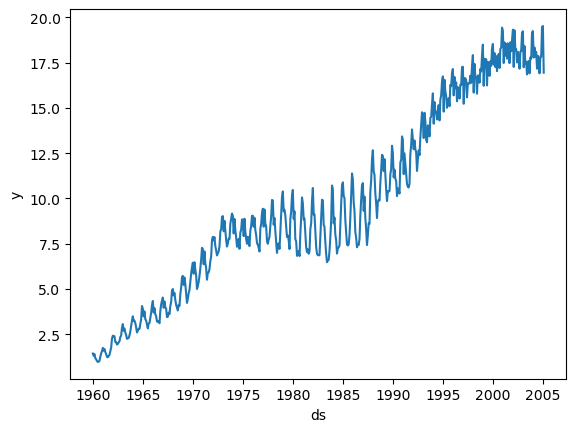

In [8]:
sns.lineplot(df, x='ds', y= 'y')

<Axes: xlabel='ds'>

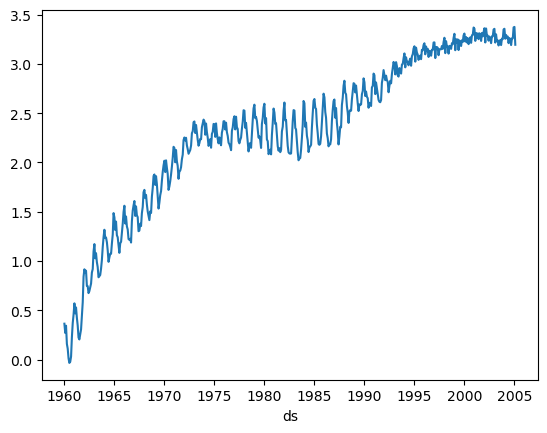

In [9]:
optim_lambda = boxcox_lambda(df["y"].to_numpy(), method="guerrero", season_length=12)
y_transformed = boxcox(df["y"].to_numpy(), optim_lambda)
sns.lineplot(df, x='ds', y=y_transformed)

# The transforamtion was unable to stabilise the level of variation of the series because there was a non monotonic increase on the original serie
# From 1960 to 1990 the variation increased monotonically and we can see that the transform was appropriate for this range, 
# But then from 1990 to 2005 the variation changed trend and their amplitude started to decrease
# In this cycle the transformation squished down even further those amplitude which didn't solve our non stationarity problem